#Binary classification using neural networks
* Find the `pima-diabetes.csv` file in the `./data/` folder.
* Can we correctly classify `Diabetes` knowing all the input variables?

In [0]:
from google.colab import files
uploaded = files.upload()
file_name = 'pima-diabetes.csv'

Saving pima-diabetes.csv to pima-diabetes.csv


In [0]:
import pandas as pd
data = pd.read_csv(file_name, delimiter=',')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
import numpy as np
# Use np.loadtxt() instead when there are non-numeric values as well
dataset = np.genfromtxt(file_name, delimiter=",", skip_header = True) 

In [0]:
np.set_printoptions(precision = 2) # does not work for too wide array
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

print('')
print(dataset.shape)
print('')
print(dataset[0:5])


(768, 9)

[[ 6.0  148.0  72.0  35.0  0.0  33.6  0.6  50.0  1.0]
 [ 1.0  85.0  66.0  29.0  0.0  26.6  0.4  31.0  0.0]
 [ 8.0  183.0  64.0  0.0  0.0  23.3  0.7  32.0  1.0]
 [ 1.0  89.0  66.0  23.0  94.0  28.1  0.2  21.0  0.0]
 [ 0.0  137.0  40.0  35.0  168.0  43.1  2.3  33.0  1.0]]


In [0]:
X = dataset[:, :-1]
Y = dataset[:, -1]

In [0]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

#Design a neural network

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_dim = len(X[0, :]), activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


#Draw the network architecture
What is the total parameters? How?

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


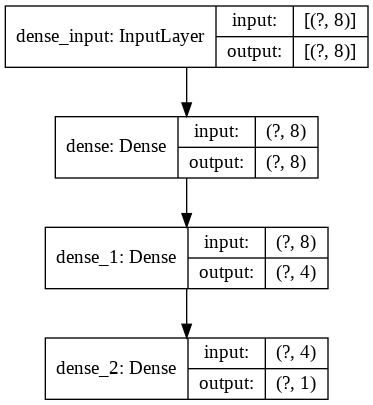

In [0]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes=True)

In [0]:
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.fit(X, Y, epochs = 1024, verbose = 0)

In [0]:
print ('True Validation Data:')
print(Y[:10])
prediction = model.predict(X)
print ('Prediction:')
print(prediction[0:10].T)

True Validation Data:
[ 1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0]
Prediction:
[[ 0.8  0.0  0.9  0.0  0.6  0.1  0.0  0.7  1.0  0.3]]


#Evaluating binary predictions

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y, prediction.round())
precision = precision_score(Y, prediction.round())
recall = recall_score(Y, prediction.round())
f1score = f1_score(Y, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

Accuracy: 82.42%
Precision: 74.72%
Recall: 75.00%
F1-score: 0.75
